In [4]:
import torch
from torch import nn
import numpy as np
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from utils.image import *
from models.convcnp import Conv2dCNP
import matplotlib.pyplot as plt

In [9]:
def train(model, dataloader, optimizer):
    model.train()
    for i, (images, _) in enumerate(dataloader):
        loss_fn = lambda x: -x.log_prob(images).sum(1).mean()

        erased, mask = mask_random(images, 0.5)

        optimizer.zero_grad()
        p = model(erased, mask)

        loss = loss_fn(p)
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
          print(f"iteration {i} - loss {loss}")



In [2]:
trainset = CIFAR10("data", "train", download=True, transform=transforms.ToTensor())
testset = CIFAR10("data", "test", download=True, transform=transforms.ToTensor())
testloader = DataLoader(testset, 8, True)
trainloader = DataLoader(trainset, 16, True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
model = Conv2dCNP(3)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [10]:
epochs = 1
for i in range(epochs):
  print(f"epoch {i}")
  train(model, trainloader, optimizer)

epoch 0
iteration 0 - loss 90.34305572509766


KeyboardInterrupt: 

In [12]:
model.eval()
original = next(iter(testloader))[0]

erased_rect, mask_rect = mask_rectangle(original, (0.2, 0.2), (1 / 3, 3))
erased_rand, mask_rand = mask_random(original, 0.2)

inpainted_rect = model(erased_rect, mask_rect).mean
inpainted_rand = model(erased_rand, mask_rand).mean

rmse_rect = ((original - inpainted_rect) ** 2).mean()
rmse_rand = ((original - inpainted_rand) ** 2).mean()

/opt/homebrew/lib/python3.9/site-packages/torchvision/transforms/transforms.py:1643: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = torch.tensor(value)[:, None, None]


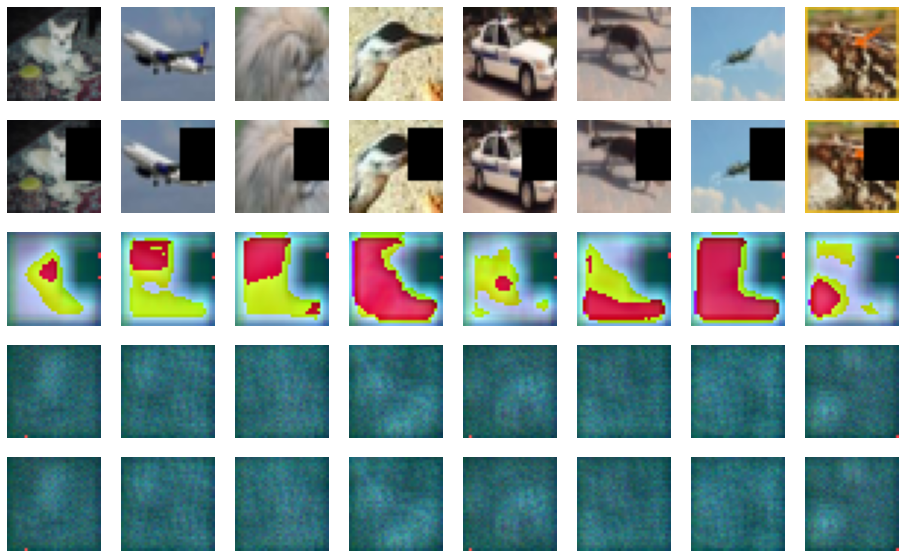

In [20]:
fig, ax = plt.subplots(5, 8, figsize=(16, 10))

for i in range(8):
    ax[0, i].imshow(to_pil_image(original[i]))
    ax[1, i].imshow(to_pil_image(erased_rect[i]))
    ax[2, i].imshow(to_pil_image(inpainted_rect[i]))
    ax[3, i].imshow(to_pil_image(inpainted_rand[i]))    
    ax[4, i].imshow(to_pil_image(inpainted_rand[i]))

[p.set_axis_off() for p in ax.ravel()]
plt.show()